In [3]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import pickle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
winedata = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
winedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
winedata.shape   ##tells about no of rows and coloumn

(1599, 12)

In [6]:
###statstical data analysis
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#checking null values
winedata.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

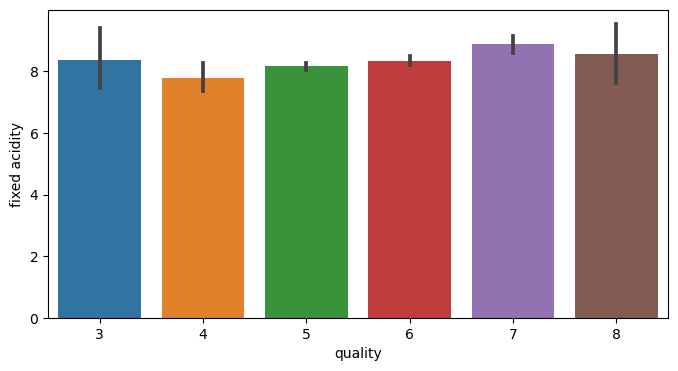

In [8]:
#comparing label and features using data visualisation
fig=plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='fixed acidity',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

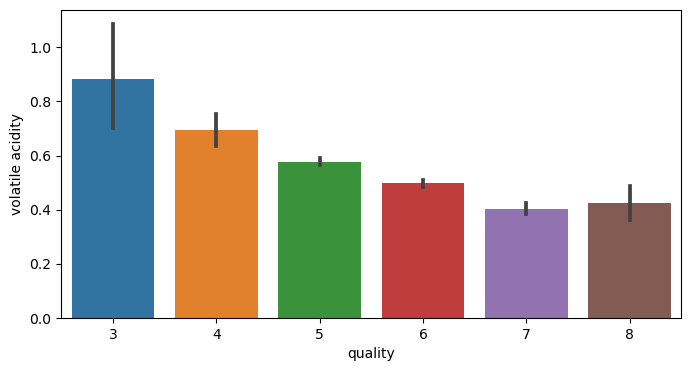

In [9]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='volatile acidity',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

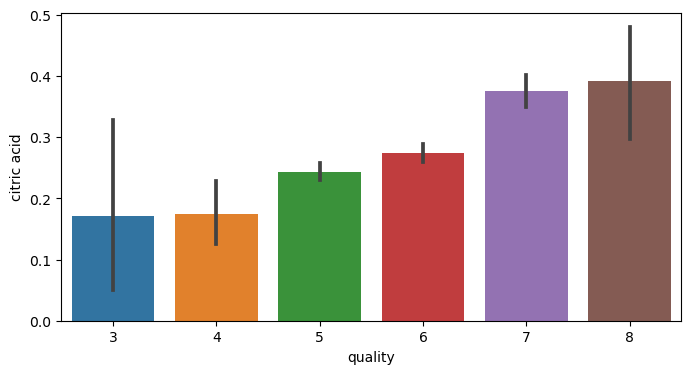

In [10]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='citric acid',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

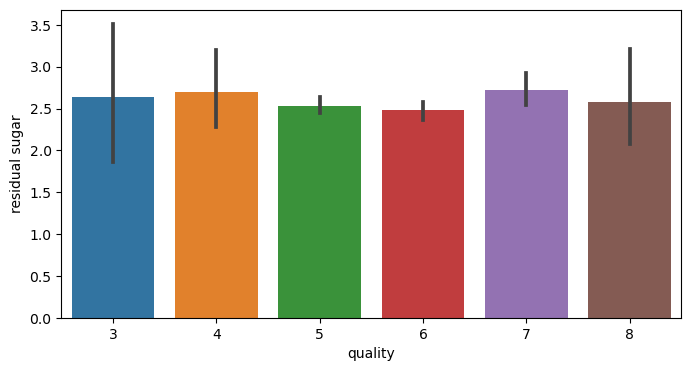

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='residual sugar',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

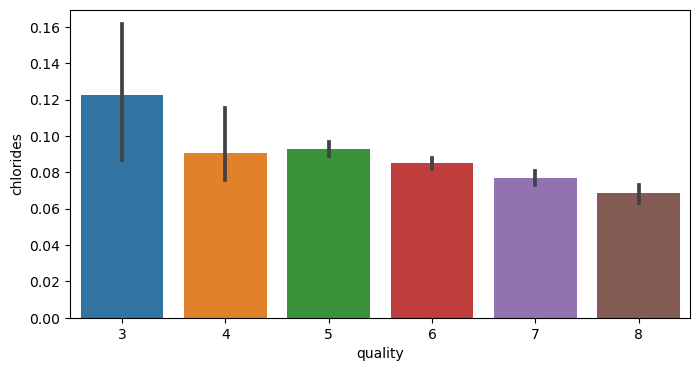

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='chlorides',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

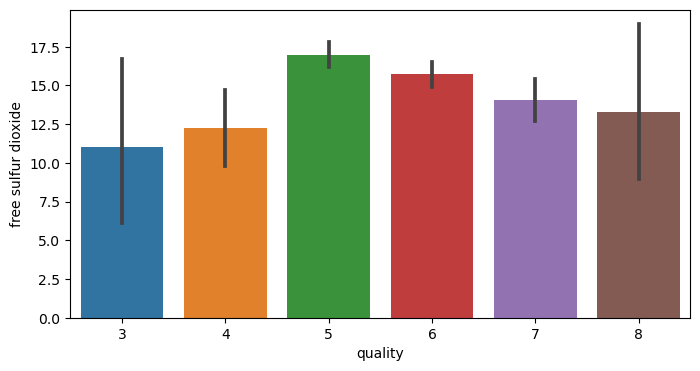

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='free sulfur dioxide',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

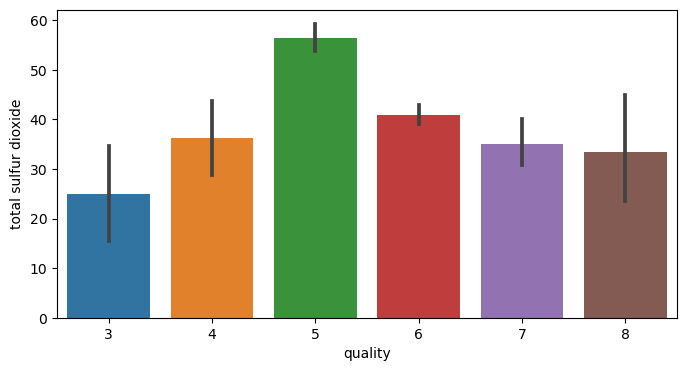

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='total sulfur dioxide',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='density'>

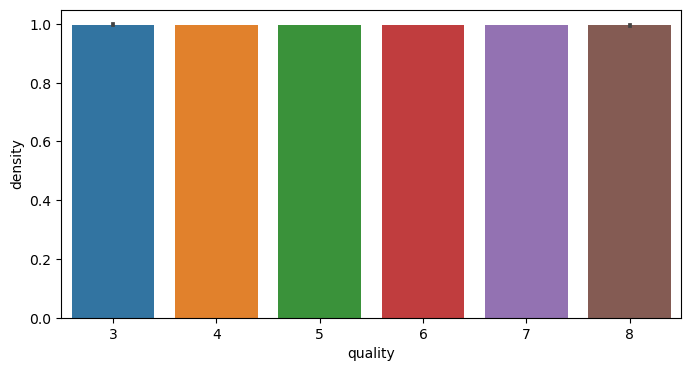

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='density',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='pH'>

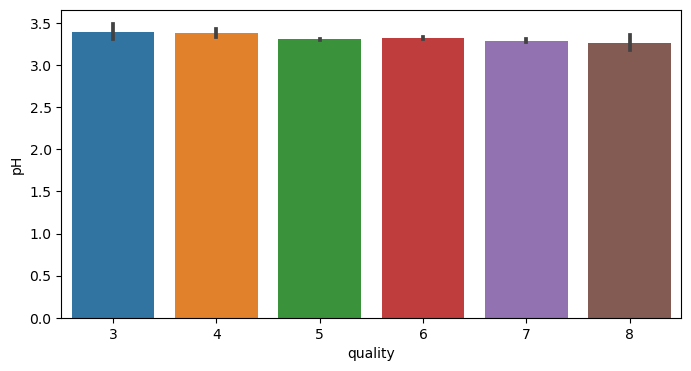

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='pH',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

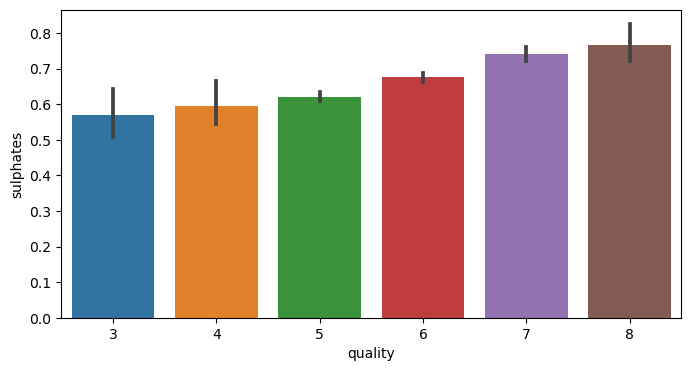

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='sulphates',data=winedata)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

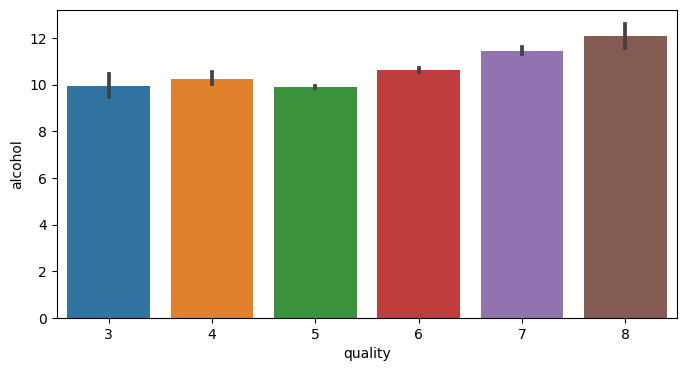

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x='quality',y='alcohol',data=winedata)

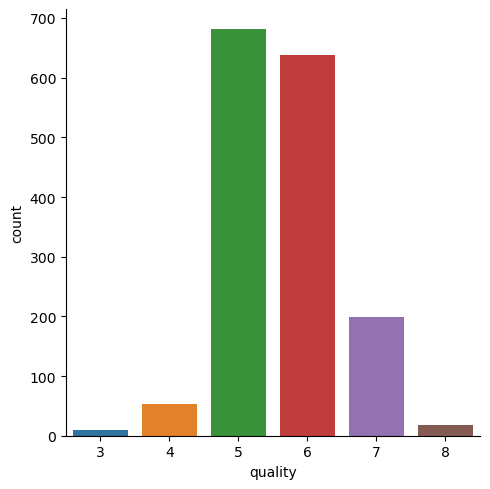

In [19]:
sns.catplot(x='quality',data=winedata,kind='count') ##value count for each quality of wine

<AxesSubplot:>

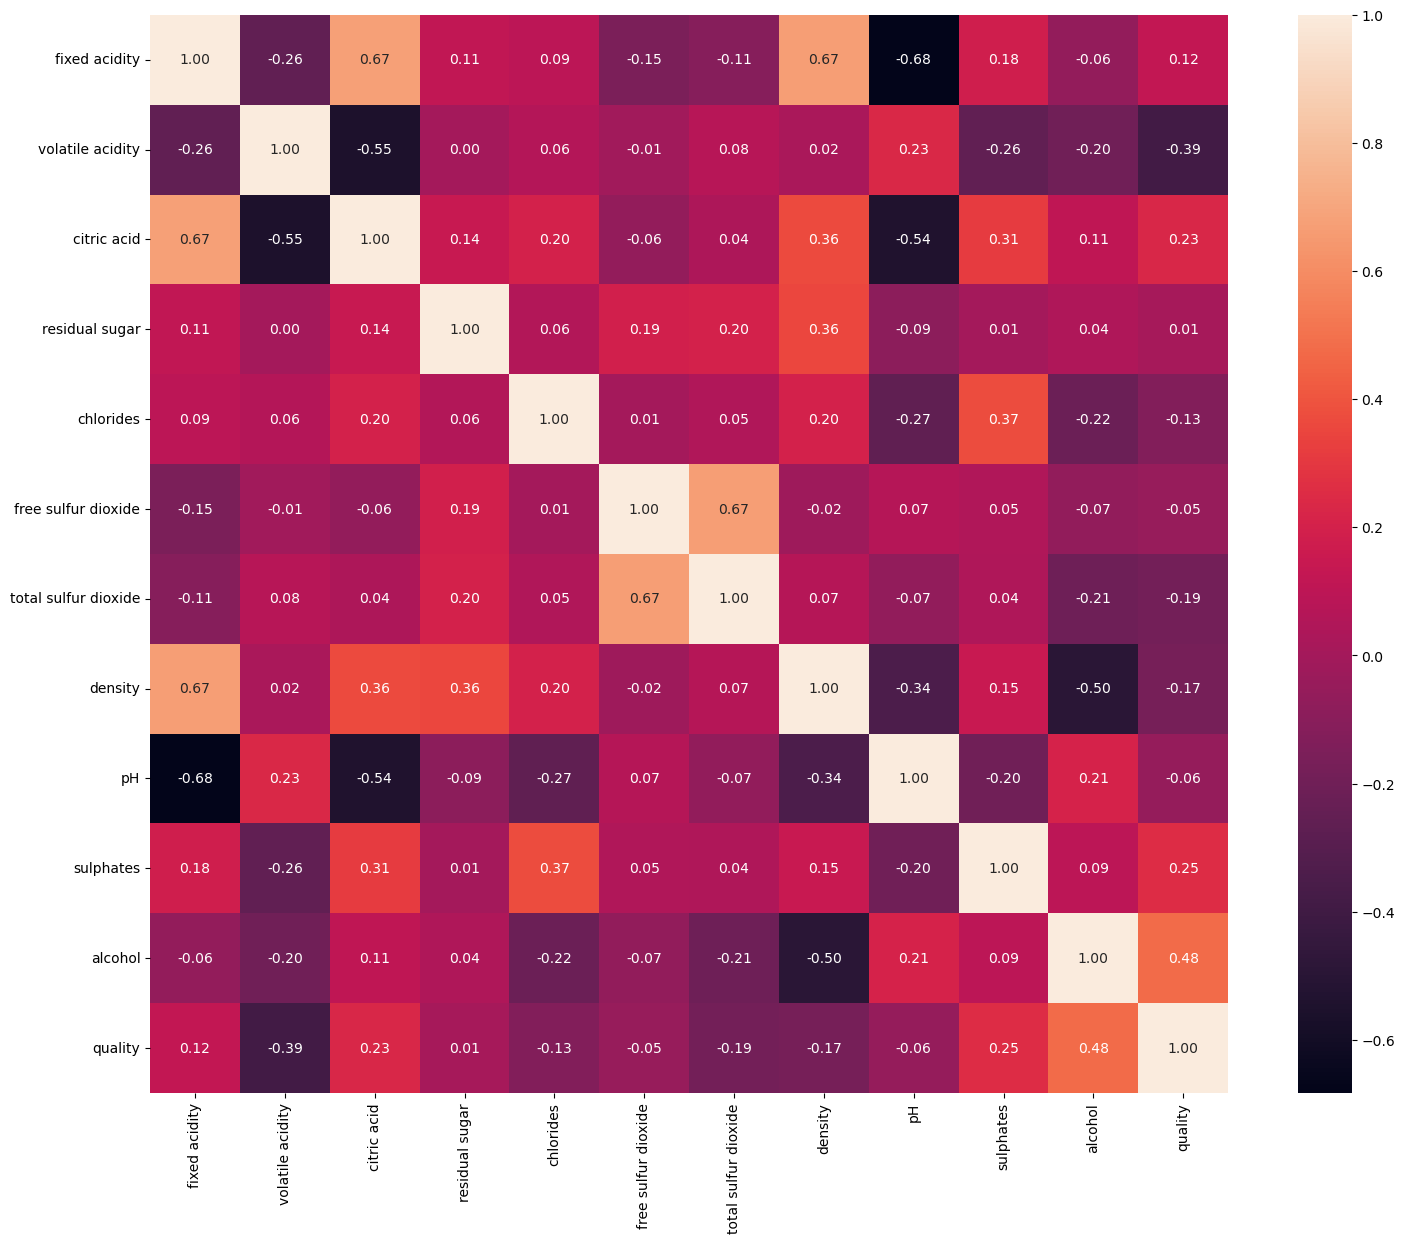

In [20]:
#data Analysis and visualisation
correlation=winedata.corr()
plt.figure(figsize=(18,14))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10})

In [ ]:
##with this heat map we check corelation between features and label

In [22]:
#data Preprocessing
#seperate the features and label
x=winedata.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [23]:
#Label Binarization for quality of wine if>7 is Good and lesser willer be Bad
y=winedata['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [24]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [27]:
####standardizing the data

x_features=x
x=StandardScaler().fit_transform(x)   ###which will be in the range [0,1][-1,0][-1,1]

In [28]:
##Testing and Training the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [29]:
len(x_train)

1199

In [30]:
len(y_train)

1199

In [31]:
len(x_test)

400

In [32]:
len(y_test)

400

In [33]:
###Modelling and training the data for SVM Algorithm

from sklearn.svm import SVC
model1=SVC(random_state=40)


In [34]:
model1.fit(x_train,y_train)  ###training our data

SVC(random_state=40)

In [35]:
model1.score(x_train,y_train)

0.896580483736447

In [36]:
model1.score(x_test,y_test)

0.8925

In [37]:
pred1=model1.predict(x_test)

In [38]:
y_test

635     0
581     0
206     1
547     0
1515    0
       ..
199     0
61      0
766     0
1024    1
1023    0
Name: quality, Length: 400, dtype: int64

In [39]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
df=pd.DataFrame(pred1)

In [41]:
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


In [42]:
###Classification of Data

from sklearn.metrics import classification_report


In [43]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       339
           1       0.91      0.33      0.48        61

    accuracy                           0.89       400
   macro avg       0.90      0.66      0.71       400
weighted avg       0.89      0.89      0.87       400



In [44]:
###Modelling and Training with Decision Tree Algorithm

model2=DecisionTreeClassifier(random_state=41)
model2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=41)

In [46]:
model2.score(x_train,y_train)

1.0

In [47]:
model2.score(x_test,y_test)

0.8675

In [48]:
pred2=model2.predict(x_test)
pred2

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [49]:
df1=pd.DataFrame(pred2)

In [50]:
df1

,0
0,0
1,0
2,1
3,0
4,0
...,...
395,0
396,0
397,0
398,1


In [51]:
###classification of data for DecisionTree
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       339
           1       0.56      0.62      0.59        61

    accuracy                           0.87       400
   macro avg       0.74      0.77      0.76       400
weighted avg       0.87      0.87      0.87       400



In [54]:
###Modelling and Training using Random Forest Classifier method

from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(random_state=40)


In [55]:
model3.fit(x_train,y_train)

RandomForestClassifier(random_state=40)

In [56]:
model3.score(x_test,y_test)

0.9125

In [57]:
pred3=model3.predict(x_test)

In [58]:
pred3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
df2=pd.DataFrame(pred3)

In [60]:
df2

,0
0,0
1,0
2,1
3,0
4,0
...,...
395,0
396,0
397,0
398,1


In [61]:
#comparing accuracy between 3 algorithm
acc=[]

In [63]:
acc.append(model1.score(x_test,y_test))
acc.append(model2.score(x_test,y_test))
acc.append(model3.score(x_test,y_test))


In [64]:
acc_name=['DecisionTreeClassifier','SVM','RandomForest']

In [65]:
acc

[0.8925, 0.8675, 0.9125]

In [66]:
acc_name

['DecisionTreeClassifier', 'SVM', 'RandomForest']

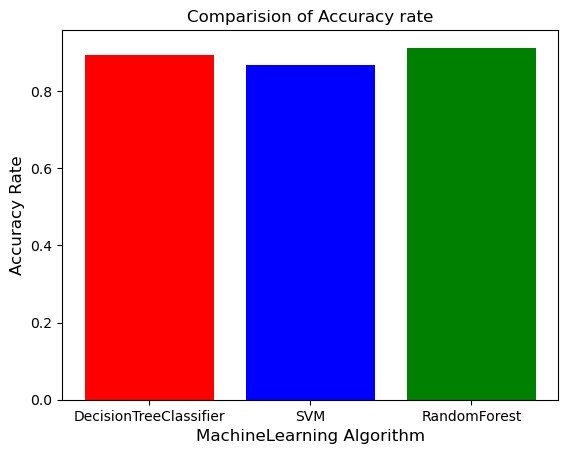

In [69]:
colours=['r','b','g']
plt.xlabel('MachineLearning Algorithm',fontsize=12)
plt.ylabel('Accuracy Rate',fontsize=12)
plt.title('Comparision of Accuracy rate')
plt.bar(acc_name,acc,color=colours)
plt.show()

###from this Bargraph we come to know Random forest have good accuracy

In [70]:
###Confusion Matrix for all the Algorithm

from sklearn.metrics import confusion_matrix


In [71]:
result=confusion_matrix(y_test,pred1)

In [72]:
print(result)

[[337   2]
 [ 41  20]]


###ConfusionMatrix for DesionTree Algorithm

In [77]:

result1=confusion_matrix(y_test,pred2)
print(result1)

[[309  30]
 [ 23  38]]


In [78]:
###confusion Matrix for RandomForest Algorithm 

result2=confusion_matrix(y_test,pred3)
print(result2)

[[333   6]
 [ 29  32]]


In [81]:
###Plot ROC curve for DecisionTreeClassifier

probs1=model2.predict_proba(x_test)

In [82]:
probs1=probs1[:,1]
auc1=roc_auc_score(y_test,probs1)
print(auc1)           ###AUC value

0.767227622225446


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


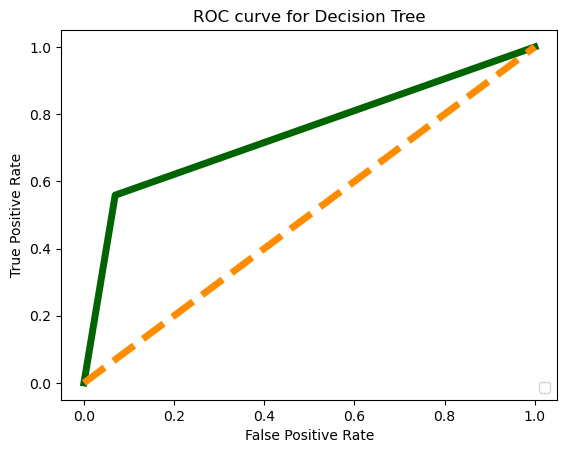

In [100]:

fpr,tpr,thresh=roc_curve(probs1,y_test)


plt.figure()
plt.plot(fpr,tpr,color='darkgreen',lw=5)
plt.plot([0,1],[0,1],color='darkorange',lw=5,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.show()


In [87]:
###Plot ROC curve for RandomForestClassifier

probs2=model3.predict_proba(x_test)
probs2=probs2[:,1]
auc2=roc_auc_score(y_test,probs1)
print(auc2)           ###AUC value

0.767227622225446


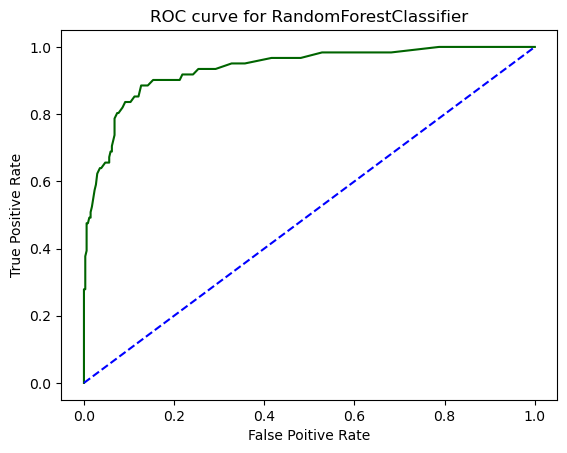

In [103]:
fpr,tpr,thresh=roc_curve(y_test,probs2)

plt.figure()
plt.plot(fpr,tpr,color='darkgreen')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Poitive Rate')
plt.title('ROC curve for RandomForestClassifier')
plt.show()


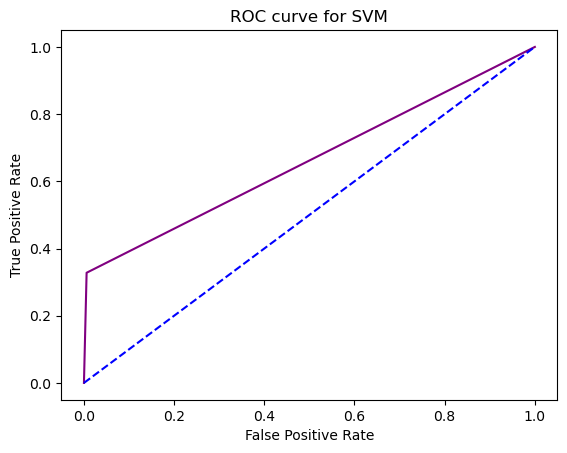

In [104]:
###Plot ROC curve for SVM

fpr,tpr,thresh=roc_curve(y_test,pred1)

plt.figure()
plt.plot(fpr,tpr,color='purple')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for SVM')
plt.show()


In [110]:
###Dumping file using pickle method

filename="WineQuality.pkl"
pickle.dump(model3,open(filename,'wb'))

###Conclusion:  
   Random Forest method gives 91% Accuracy rate.